# tpubins -- HW2
init

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("LRS_Pre_Assessment_trimmed_rank.csv")
# df.head()

## 2.b
Drop the “flight” column and one-hot-encode the “rank” & “gender” columns with `df = pd.get_dummies(df, drop_first=True)`.
`drop_first` is needed so the columns are linearly independent.

In [2]:
df.drop(columns="Flight", inplace=True)
dfe = pd.get_dummies(df, drop_first=True) # encoded
dfe.head()

,Age,ORS_total,PTSD_score,Sleep_score,survey_Burnout,survey_FitSat,BMI,BodyFatPerc,MusclePerc,APFT_1_is_pass,Rank_SrEnlisted,Rank_officer,Gender_M
0,40,9.8,5,8,2,3,27.9,0.3000,0.328,1,0,0,1
1,22,5.0,22,10,4,2,33.0,0.3680,0.308,0,0,0,1
2,20,9.6,1,3,1,3,24.8,0.0273,0.356,0,0,0,1
3,21,5.0,12,13,5,3,24.5,0.4160,0.221,1,0,0,0
4,27,8.3,0,6,1,5,23.7,0.2120,0.385,1,0,0,1


## 2.c
Create a Data Understanding table using .describe() and include 3 Data Understanding visualizations such as a scatterplot, histogram, pairplot or correlation matrix.

In [3]:
dfe.describe()

,Age,ORS_total,PTSD_score,Sleep_score,survey_Burnout,survey_FitSat,BMI,BodyFatPerc,MusclePerc,APFT_1_is_pass,Rank_SrEnlisted,Rank_officer,Gender_M
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,27.942675,7.620382,9.312102,7.305732,2.140127,3.331210,27.110191,0.294873,0.327968,0.707006,0.509554,0.038217,0.757962
std,6.164666,1.955621,11.795182,3.939710,0.812235,0.803746,4.093791,0.086974,0.060547,0.456592,0.501508,0.192332,0.429688
min,19.000000,0.200000,0.000000,0.000000,1.000000,1.000000,18.400000,0.014700,0.036500,0.000000,0.000000,0.000000,0.000000
25%,23.000000,6.700000,1.000000,4.000000,2.000000,3.000000,24.400000,0.248000,0.289000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,8.000000,5.000000,7.000000,2.000000,3.000000,27.100000,0.296000,0.334000,1.000000,1.000000,0.000000,1.000000
75%,33.000000,9.000000,12.000000,10.000000,2.000000,4.000000,29.700000,0.346000,0.366000,1.000000,1.000000,0.000000,1.000000
max,45.000000,10.000000,68.000000,22.000000,5.000000,5.000000,38.300000,0.495000,0.473000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='ORS_total', ylabel='APFT_1_is_pass'>

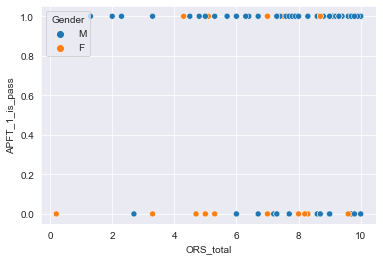

In [4]:
sns.scatterplot(x=df.ORS_total, y=df.APFT_1_is_pass, hue=df.Gender)

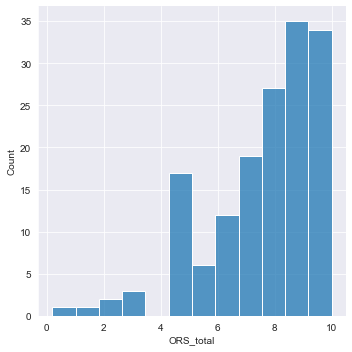

In [5]:
sns.displot(x=df.ORS_total)

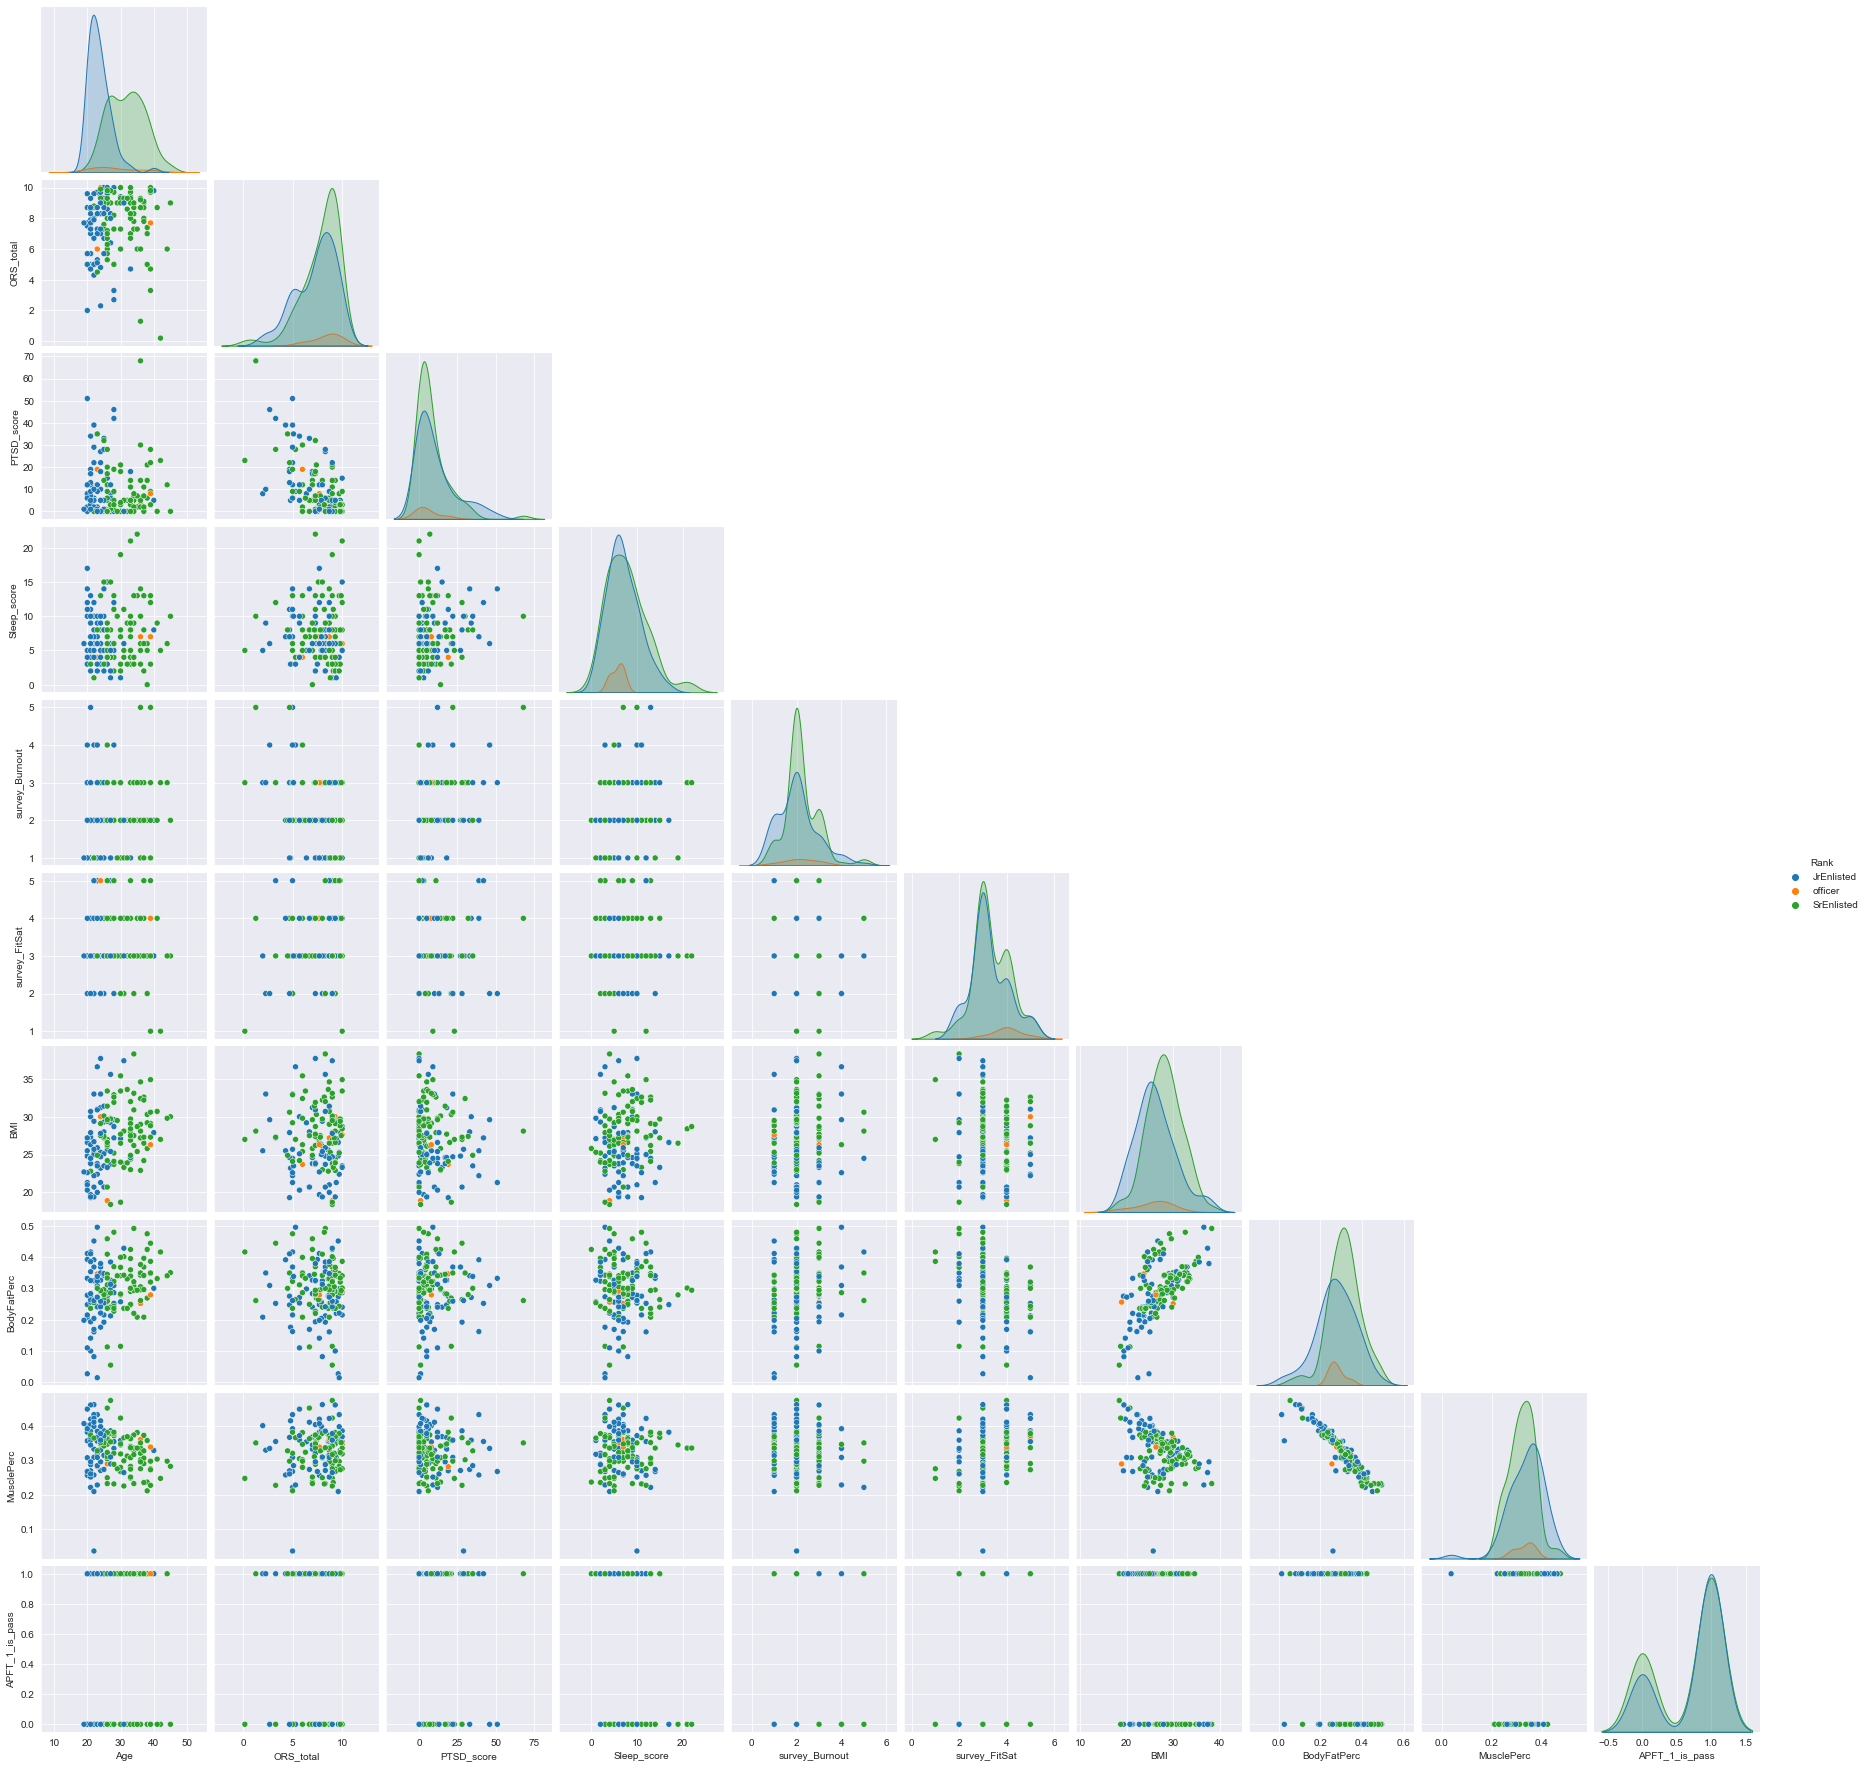

In [6]:
sns.pairplot(df, corner=True, hue="Rank")

## 2.d
Based on your data understanding visualizations, perform data preparation transformations as required, such as normalization or log transform.

In [7]:
scaler = StandardScaler() # use std of the mean
scaled = scaler.fit_transform(dfe.values) # df.values transforms to np.array
dft = pd.DataFrame(scaled, columns=dfe.columns)
# ~sklearn.decomposition.PCA : Further removes the linear
# correlation across features with 'whiten=True'

## 2.e.i
Split your dataset into 70% train & 30% test.

In [18]:
# split dataset into 70% train 30% test
Xe_train, Xe_test, ye_train, ye_test = train_test_split(dfe.drop("APFT_1_is_pass", axis=1), dfe.APFT_1_is_pass, test_size=0.3, random_state=42)
Xt_train, Xt_test, yt_test, yt_train = train_test_split(dft.drop("APFT_1_is_pass", axis=1), dft.APFT_1_is_pass, test_size=0.3, random_state=42)

## 2.e.ii
1. All features without transforms or normalization.
2. All features with transforms and normalization.
3. Features selected using p-value selection.

In [19]:
from statsmodels.tools.tools import add_constant
# 1. all features
lgte = Logit(endog=Xe_train, exog=add_constant(ye_train))
results_e = lgte.fit()

ValueError: endog must be in the unit interval.

## 2.e.iii
Calculate the accuracy (on the test dataset) for each variation, and use that to determine the “best” variation. The test dataset is critical to detecting overfitting on the model created from the train dataset, so use the model created from the train dataset. It will make me sad if you make a new model from the test dataset.

## 2.e.iv
For the “best” variation, using the train dataset, create a ROC curve plot and calculate the accuracy, odds ratio, AUC, classification report and confusion matrix.

## 2.e.v
For the “best” variation, using the test dataset, create a ROC curve plot and calculate the accuracy, AUC, classification report and confusion matrix. The odds ratio does not need to be recalculated.

## 2.f
Include a text block related to Business/Mission Understanding:
    i. Review the “Binary Classification metric summary” file from the week 2 Canvas page.
    ii. Mention what the majority class is (either passing or failing the test), the % of datapoints in the majority class and whether or not the dataset is balanced.
    iii. Discuss the penalty (if any) associated with a False Negative and False Positive. Mention if the penalty is equal or unequal.
    iv. Discuss the metrics (accuracy/f1/etc) that would be most appropriate for this problem based on the balance & penalties

## 2.g
Include a summary text block:
    i. The contribution of the most important 2-3 input variables to your best model, such as z or p test scores.
    ii. A discussion of the performance metrics from part 2.e. Also, compare the “best model” performance on the train & test datasets, and mention if the model has overfit the data
    iii. Write in a formal writing style based on the Appendix B guidance, with the exception that references and citations are not required.